padding psf

0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 

0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 


Text(0.5, 1.0, 'non-circular')

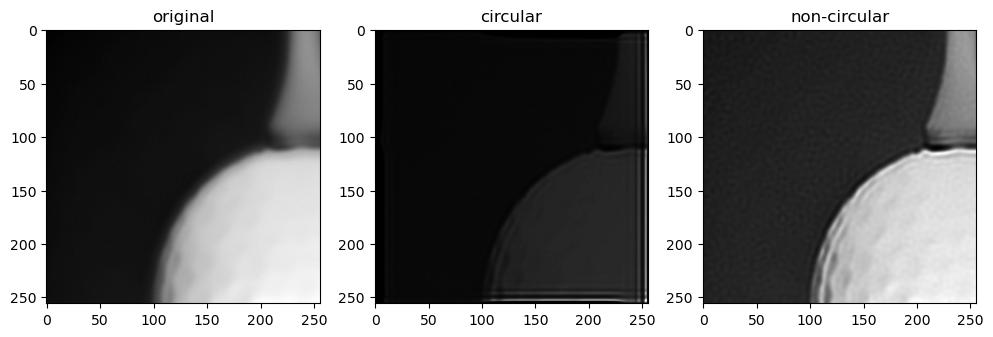

In [13]:
from skimage.io import imread
import matplotlib.pyplot as plt

try:
    from tnia.deconvolution.richardson_lucy import richardson_lucy_cp
except ImportError:
    print('Could not import GPU version')

from tnia.deconvolution.richardson_lucy_np import richardson_lucy_np
import os
import numpy as np

imdir = r".\small_test_images"
psfname = "psf.fits.tif"
imname = "q4.fits.tif"

impath = os.path.join(imdir, imname)

psf = imread(os.path.join(imdir, psfname))

psf = psf.astype(float)
psf = psf/psf.sum()


imname = os.path.join(imdir, imname)

im = imread(imname)
im = im.astype(float)

iterations = 200

gpu = False

if gpu:
    decon = richardson_lucy_cp(im, psf, iterations)
    decon_noncirc = richardson_lucy_cp(im, psf, iterations, noncirc=True)
else:
    decon = richardson_lucy_np(im, psf, iterations)
    decon_noncirc = richardson_lucy_np(im, psf, iterations, noncirc=True)

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131)
ax.imshow(im, cmap='gray')
ax.set_title('original')
ax = fig.add_subplot(132)
ax.imshow(decon, cmap='gray')
ax.set_title('circular')
ax = fig.add_subplot(133)
ax.imshow(decon_noncirc, cmap='gray')
ax.set_title('non-circular')